# CPA - Key Recovering

When focusing on key recovering, CPA uses the Pearson Correlation Coefficient to reveal the "collision" of secret constant data with public variable information.

`_fixedkey` traces are used to reveal the fixed secret key.

In [2]:
import numpy as np
import random
import lascar
lascar.logger.setLevel(lascar.logging.CRITICAL)

import datasets

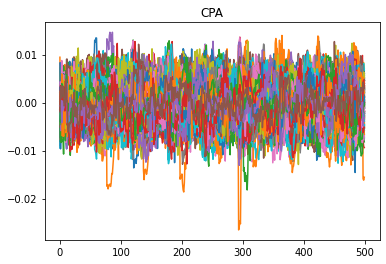

In [5]:
data = datasets.dataset("cw_loop5_fixedkey")

trace = lascar.TraceBatchContainer(data['trace'], data)
engine = lascar.CpaEngine(
    name="CPA",
    selection_function=lambda value, guess: lascar.tools.aes.sbox[value["input"][0] ^ guess],
    guess_range=range(256),
)

session = lascar.Session(
    trace,
    engine=engine,
    output_method=lascar.MatPlotLibOutputMethod(engine),
    progressbar=False,
)
session.run(batch_size=100_000)
